翻译 https://www.kaggle.com/batzner/gini-coefficient-an-intuitive-explanation

# Gini Coefficient - An Intuitive Explanation

I was struggling a bit with the definition of the Scoring Metric. Googling "Gini Coefficient" gives you mostly economic explanations. Here is a descriptive explanation with regard to the challenge.

* 这次的评分度量方式是个啥?
* 谷歌**Gini Coefficient**，得到最常见的经济学解释？


First, let's define our predictions and their actual values:

* 首先，定义预测值和真实值。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.integrate

predictions = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

We use the Python implementation from the Gini coefficient discussion with code samples:

* 咱们用这里的Python实现 https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703

In [2]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

We calculate the Gini coefficient for the predictions:
    
* 计算基尼系数

In [4]:
gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini= gini_normalized(actual, predictions)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.189, Max. Gini: 0.300, Normalized Gini: 0.630


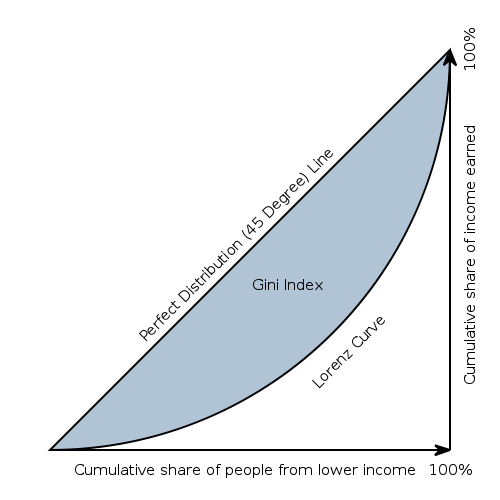

In [6]:
import os
from IPython.display import Image as PImage

PImage("500px-Economics_Gini_coefficient.svg.png")

So, how do we get this Gini of 0.189 and the Normalized Gini of 0.630?

* Gini: 0.189 是个啥？
* Max Gini: 0.300 又是个啥？
* Normalized Gini: 0.630 又是个啥？

## Economic Explanation

The first figure on the "Gini Coefficient" Wikipedia article is this one:

* 维基上的图。

They go through the population from poorest to richest and plot the running total / cumulative share of income, which gives them the Lorenz Curve. The Gini Coefficient is then defined as the blue area divided by the area of the lower triangle.

* x轴从最穷到最富，y轴累计收入占比，曲线叫做**Lorenz Curve**。
* 如果是完全随机的话，则曲线是45度的直线。
* **Gini Coefficient**是蓝色部分面积比下面三角形的面积。


## Application to our challenge

Instead of going through the population from poorest to richest, we go through our predictions from lowest to highest.

* 在这个比赛中。
* 不是最穷到最富，而是按预测值从低到高排列。

Instead of summing up the income, we sum up the actual values of our predictions:

* 不是累加收入，而是累加真实值。


In [7]:
# Sort the actual values by the predictions
data = zip(actual, predictions)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]
print('Sorted Actual Values', sorted_actual)

Sorted Actual Values [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


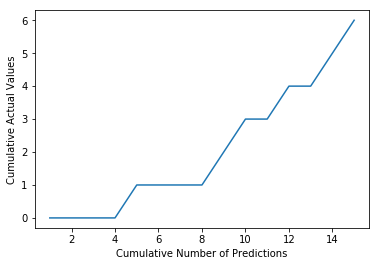

In [8]:
# Sum up the actual values
cumulative_actual = np.cumsum(sorted_actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1)

plt.plot(cumulative_index, cumulative_actual)
plt.xlabel('Cumulative Number of Predictions')
plt.ylabel('Cumulative Actual Values')
plt.show()

This corresponds to the Lorenz Curve in the diagram above.

* 上面的图表对应**Lorenz Curve**。


We normalize both axes so that they go from 0 to 100% like in the economic figure and display the 45° line for illustrating random guessing:

* 接下来，对x轴和y轴都做归一化，令两者均从0%~100%。
* 再加上45°的直线。


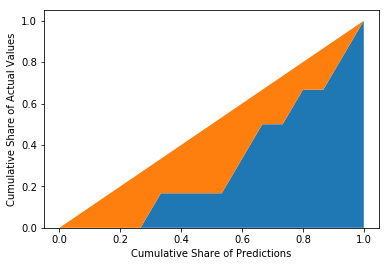

In [9]:
cumulative_actual_shares = cumulative_actual / sum(actual)
cumulative_index_shares = cumulative_index / len(predictions)

# Add (0, 0) to the plot
x_values = [0] + list(cumulative_index_shares)
y_values = [0] + list(cumulative_actual_shares)

# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values)]

plt.stackplot(x_values, y_values, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')
plt.show()

Now, we calculate the orange area by integrating the curve function:

* 现在，计算橙色部分的面积。
* **scipy.interpolate.interp1d**，差值函数
* **scipy.integrate.quad**，定积分

In [11]:
fy = scipy.interpolate.interp1d(x_values, y_values)
blue_area, _ = scipy.integrate.quad(fy, 0, 1, points=x_values)
orange_area = 0.5 - blue_area
print('Orange Area: %.3f' % orange_area)

Orange Area: 0.189


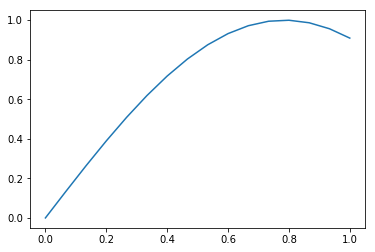

In [16]:
# 差值函数
y_values = [np.sin(2.0 * x) for x in x_values]
ftest = scipy.interpolate.interp1d(x_values, y_values)
plt.plot(x_values, [ftest(x) for x in x_values])
plt.show()

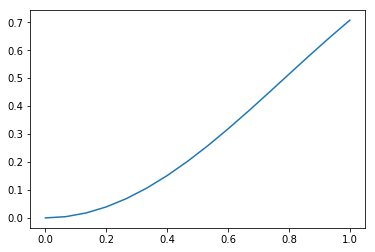

In [26]:
# 定积分函数
blue_area, _ = scipy.integrate.quad(ftest, 0, 1, points=x_values)
y_quad_values = [scipy.integrate.quad(ftest, 0, x, points=x_values[0: i+1])[0] for i, x in enumerate(x_values[1:])]
y_quad_values = [0] + y_quad_values
plt.plot(x_values, y_quad_values)
plt.show()

So, the orange area is equal to the Gini Coefficient calcualted above with the gini function. We can do the same using the actual values as predictions to get the maximum possible Gini Coefficient.

* **Gini Coefficient**计算成功。
* 令预测值和真实值一致，即可得到（当前样本的）最大**Gini Coefficient**。

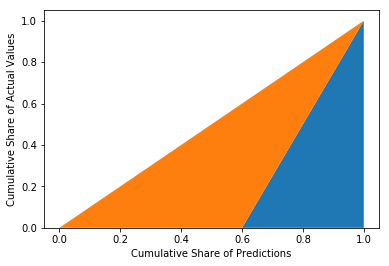

Orange Area: 0.300


In [27]:
cumulative_actual_shares_perfect = np.cumsum(sorted(actual)) / sum(actual)
y_values_perfect = [0] + list(cumulative_actual_shares_perfect)

# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values_perfect)]

plt.stackplot(x_values, y_values_perfect, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')
plt.show()

# Integrate the the curve function
fy = scipy.interpolate.interp1d(x_values, y_values_perfect)
blue_area, _ = scipy.integrate.quad(fy, 0, 1, points=x_values)
orange_area = 0.5 - blue_area
print('Orange Area: %.3f' % orange_area)

Dividing both orange areas gives us the Normalized Gini Coefficient:

* 将以上两次得到的橙色面积相除，得到**Normalized Gini Coefficient**。

$$\frac{0.189}{0.3} = 0.630$$

# Alternative explanation

I also found another interpreation of the Gini Coefficient here. Again, we take the predictions and actual values from above and sort them in descending order:

* 另一种解释。

In [28]:
print("Predictions", predictions)
print("Actual Values", actual)
print("Sorted Actual", list(reversed(sorted_actual)))

Predictions [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
Actual Values [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Sorted Actual [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]


Now, we count the number of swaps of adjacent digits (like in bubble sort) it would take to get from the "Sorted Actual" state to the "Actual Values" state. In this scenario, it would take 10 swaps.

* 按预测值从大到小排列。
* 计算相邻元素的逆序数，即通过交换元素将**Sorted Actual**状态变成**Actual Values**状态。
* 在这种情况下，需要10次交换。


We also calculate the number of swaps it would take on average to get from a random state to the "Actual Values" state. With 6 ones and 9 zeros this results in

* 一个包含6个1和9个0的序列。
* 计算随机状态下需要的交换次数。

$$\frac{6*9}{2}=27$$
 
swaps.

The Normalized Gini-Coefficient is how far away our sorted actual values are from a random state measured in number of swaps:

* **Normalized Gini-Coefficient**


$$NGini=\frac{swaps_{random}−swaps_{sorted}}{swaps_{random}}=\frac{27−10}{27}=63%$$
 
 
I hope I could give you a better feeling for the Gini coefficient.
